**Q-1. 
Imagine you have a dataset where you have different Instagram features like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features.
Now you have to build a model which can predict the number of likes and Time Since posted.
Dataset - This is the Dataset(https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach) You can use this dataset for this question.**


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [4]:
df = pd.read_csv('instagram_reach.csv') 

In [5]:
#df

## Basic Info 

In [6]:
df.shape

(100, 8)

In [7]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [9]:
for i in df.columns: 
    print(f'No. of unique values in {i} : {len(df[i].value_counts())}')

No. of unique values in Unnamed: 0 : 27
No. of unique values in S.No : 30
No. of unique values in USERNAME : 95
No. of unique values in Caption : 94
No. of unique values in Followers : 94
No. of unique values in Hashtags : 98
No. of unique values in Time since posted : 11
No. of unique values in Likes : 55


In [10]:
df['Time since posted'] = df['Time since posted'].apply(lambda z : z.split(" ")[0])

In [11]:
df['Time since posted'] = df['Time since posted'].astype(int)

In [12]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


<AxesSubplot:xlabel='Time since posted', ylabel='Likes'>

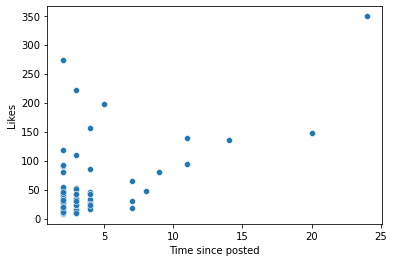

In [13]:
sns.scatterplot(df['Time since posted'], df['Likes'])

In [14]:
df.corr()

,Unnamed: 0,S.No,Followers,Time since posted,Likes
Unnamed: 0,1.000000,0.869163,0.208473,0.017372,0.010271
S.No,0.869163,1.000000,0.172002,-0.110024,0.009721
Followers,0.208473,0.172002,1.000000,0.251154,0.266218
Time since posted,0.017372,-0.110024,0.251154,1.000000,0.609888
Likes,0.010271,0.009721,0.266218,0.609888,1.000000


In [15]:
df['Followers'].min()

11

In [16]:
df.drop(labels = ['Unnamed: 0', 'S.No', 'USERNAME', 'Time since posted'], axis = 1, inplace = True)

In [17]:
df.head()

,Caption,Followers,Hashtags,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30


In [18]:
df.isnull().sum()

Caption      6
Followers    0
Hashtags     0
Likes        0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Caption    94 non-null     object
 1   Followers  100 non-null    int64 
 2   Hashtags   100 non-null    object
 3   Likes      100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [20]:
df.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


<AxesSubplot:xlabel='Likes', ylabel='Count'>

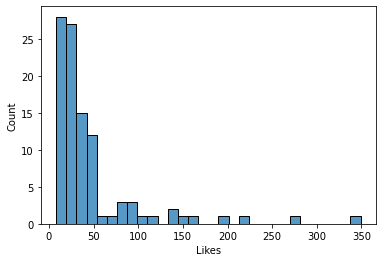

In [21]:
sns.histplot(df['Likes'])

<AxesSubplot:xlabel='Followers', ylabel='Count'>

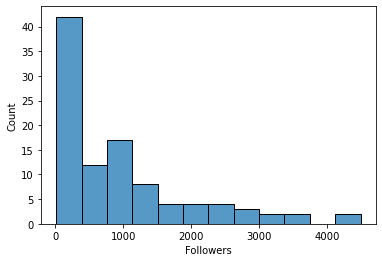

In [22]:
sns.histplot(df['Followers'])

<AxesSubplot:xlabel='Likes', ylabel='Followers'>

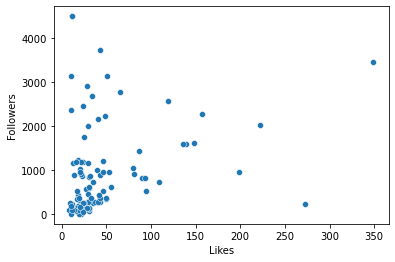

In [23]:
sns.scatterplot(data = df, x = 'Likes', y = 'Followers')

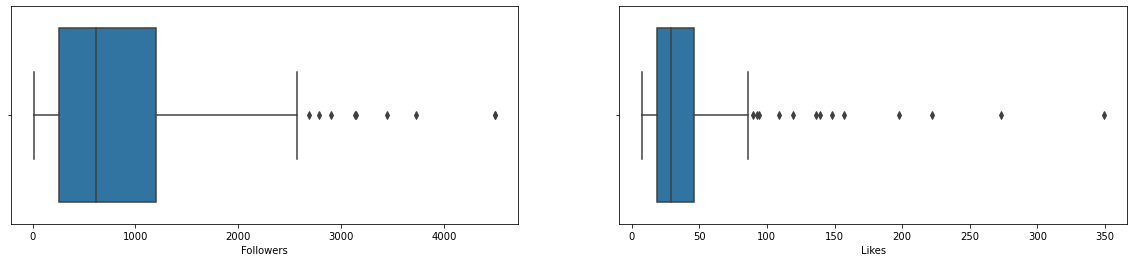

In [24]:
nf = ['Followers', 'Likes']

fig, axes = plt.subplots(1,2, figsize = (20,4))


for i in range(len(nf)): 
    sns.boxplot(df[nf[i]], ax = axes[i] )

**Observation :**  

- This data contains 100 instances. The data contains numerical and textual data. From the histrogram plots, it is observed that the numerical features are not distributed normally. The aim of this analysis is to predict 'Likes' from the input feature 'Followers', 'Caption' and 'Hashtags'. 


- 'Followers' and 'Likes' have somewhat positive correlation, but is not very significant/strong. 


- Also, it can be seen that we have outliers in our data. 

## Analysis Strategy : 

- First and foremost we need to transform the text data to vectors to perform a regression analysis. It is observed that we have long texts in 'Caption'. In 'Hashtags' we can assume that the hashtags actually contains important informations. So, throught out the textual analysis, we will consider 'Hashtags' data. 

- We also observe that the data set is small (only 100 instances). So, we need to check that whether we should remove the outliers and then build a model or we use RobustScalar and then build a model. 

### Remove the outliers

Followers    944.25
Likes         27.00
dtype: float64
-----------------------
(79, 4)
------------------------


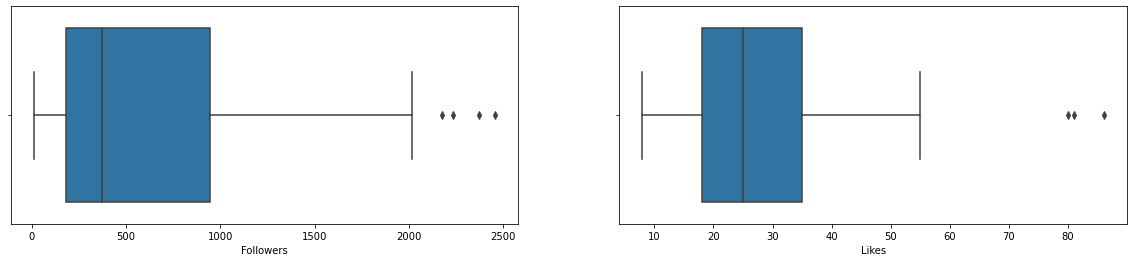

In [25]:
df2 = df.copy()
#l_feat = df2.columns

# putting limits 
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print('-----------------------')
# removing outliers
df2_out = df2[~((df2 < (Q1 - 1.5 * IQR)) |
                (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2_out.shape)
print('------------------------')



#plotting : 
fig, axes = plt.subplots(1,2, figsize=(20,4))

for i in range (len(nf)):
    sns.boxplot(df2_out[nf[i]],  ax = axes[i])
    
plt.show()    


In [26]:
df2_out.head()

,Caption,Followers,Hashtags,Likes
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30
5,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,18


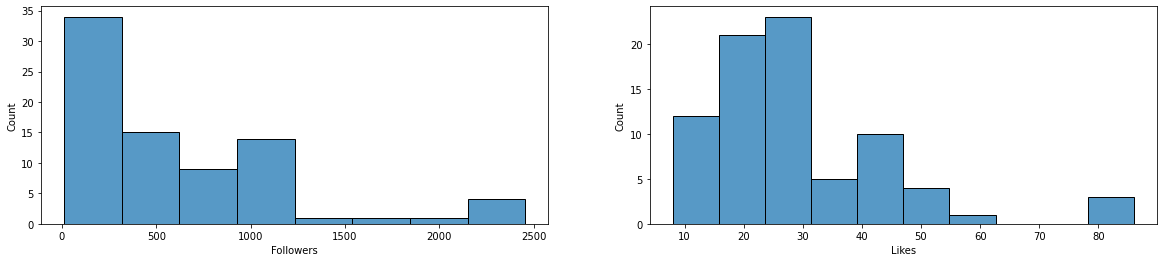

In [27]:
fig, axes = plt.subplots(1,2, figsize=(20,4))

for i in range(len(nf)) : 
    sns.histplot(df2_out[nf[i]], ax = axes[i])

In [28]:
df1 = df2_out.copy() # we take the data without outliers.
#df1 = df.copy() # we take the data with outliers. 

In [29]:
df1.shape

(79, 4)

In [30]:
df1.dropna(inplace=True)

In [31]:
print(df1['Caption'][1])

We all know where it’s going. We just have to #workresponsibly to postpone the date. This actually made into a business slide #deck .#mac #macintosh#sayhello #apple #stevejobs #ai #evolution#artificialintelligence #machinelearning#terminator #illbeback #technology#computerevolution #computerscience#sciencefiction#computersciencetosciencefiction#tomorrowstechnology #vr #ar #robot#robots #t2 #businessdeck #businessslides#illustration #sketches #drawing


#### If we observe keenly, it can be seen that the main challenge with this data is to find out the actual words/meaningful words from the hashtag data and the caption data. For example, in the above text, we have normal meaningful words (by meaningful words I mean the words for which we can find the meaning in dictionary). Along with that we have some words like  `#computerevolution`, `#computersciencetosciencefiction`, `#tomorrowstechnology` and many more. This data contains many more examples like that. 


#### The 'Caption' and 'Hashtags' columns need to clean and then the first task is to break this words into meaningful words before vectorizing the text. For splitting/breaking the compund words/lengthy words this we will use `wordninja` library.


## Cleaning text and Vectorization

In [32]:
import wordninja

In [33]:
def cleaning_process(text1) :
    text = text1
    #print(text)
    if type(text) == str : 
        text = re.sub(r"http\S+", "", text) # removing url
        
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        #print(emoji_pattern.sub(r'', text)) # no emoji
        text = emoji_pattern.sub(r'', text)
        
        nopunc = [char for char in text if char not in string.punctuation] # removing punctuation
        text = ''.join(nopunc)
        
        text = ''.join([i for i in text if not i.isdigit()]) # removing digits
        
        text = text.lower()
        
        tokens = nltk.word_tokenize(text)
        tokens = [w for w in tokens if w not in stopwords.words('english')]
        #tokens = nltk.word_tokenize(text)
        
        #lematizer = WordNetLemmatizer()
        #ps = PorterStemmer()
        #lem_text = [lematizer.lemmatize(i) for i in tokens]
        #stem_text = [ps.stem(i) for i in lem_text]
        text = ' '.join(tokens)
                
        return text
    
    return None

In [34]:
df1['cleaned_caption'] = df1['Caption'].apply(cleaning_process)

In [35]:
df1['cleaned_hastags'] = df1['Hashtags'].apply(cleaning_process)

In [36]:
df1.head()

,Caption,Followers,Hashtags,Likes,cleaned_caption,cleaned_hastags
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,know ’ going workresponsibly postpone date act...,deck mac macintoshsayhello apple stevejobs ai ...
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,alexander barinov years cfo multinationals yea...,whoiswho aitrading ai aitradingteaminstateam i...
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,sfad,iot creworkplace cdo bigdata technologytech wo...
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,ever missed call phone charging system notify ...,instamachinelearning instabigdatainstamarketin...
5,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,18,cyber attacks frequent every day affect busine...,edtech learningeducationtechnology tech learnn...


In [37]:
df1['cleaned_caption'] = df1['cleaned_caption'].apply(lambda x : ' '.join(wordninja.split(x)))

In [38]:
df1['cleaned_hastags'] = df1['cleaned_hastags'].apply(lambda x : ' '.join(wordninja.split(x)))

In [39]:
df1.head()

,Caption,Followers,Hashtags,Likes,cleaned_caption,cleaned_hastags
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,know going work responsibly postpone date actu...,deck mac macintosh say hello apple steve jobs ...
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,alexander bari nov years cf o multinationals y...,who is who a i trading a i a i trading team in...
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,s fad,i ot c re workplace cdo big data technology te...
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,ever missed call phone charging system notify ...,insta machine learning insta big data insta ma...
5,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,18,cyber attacks frequent every day affect busine...,ed tech learning education technology tech lea...


In [40]:
X = df1['cleaned_hastags']
y = df1['Likes']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [43]:
X_train.head()

15    google android machine learning women who code...
77    ex kl us ives hot tr bau to zone cars of insta...
90    developer coding programmer javascript program...
42                              artificial intelligence
10    artificial intelligence futurism machine learn...
Name: cleaned_hastags, dtype: object

In [44]:
X_test.head()

5     ed tech learning education technology tech lea...
87    grassroots development kids playing football k...
24    data enthusiast data analytics data scientist ...
1     deck mac macintosh say hello apple steve jobs ...
38    bitcoin lite coin block chain crypto currency ...
Name: cleaned_hastags, dtype: object

In [45]:
tfidf = TfidfVectorizer(lowercase=False)

In [46]:
X_train_trans = tfidf.fit_transform(X_train)
X_test_trans = tfidf.transform(X_test)

## Model Building

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [48]:
"""
# model and pipeline

#pipeline 

num_pipeline = Pipeline(steps = [#('imputer', SimpleImputer(strategy='median')), 
                                 ('scaler', StandardScaler())
                                 ])
    

text_pipeline = Pipeline(steps= [#('imputer', SimpleImputer(strategy='most_frequent')), 
                                ('vectorizer', TfidfVectorizer(stop_words='english', analyzer='word')) 
                                #('scaler',StandardScaler())
                                ])

# preprocessor 

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numfeat[:-1])#, 
    #('text_pipeline', text_pipeline, textfeat)
])
"""



"\n# model and pipeline\n\n#pipeline \n\nnum_pipeline = Pipeline(steps = [#('imputer', SimpleImputer(strategy='median')), \n                                 ('scaler', StandardScaler())\n                                 ])\n    \n\ntext_pipeline = Pipeline(steps= [#('imputer', SimpleImputer(strategy='most_frequent')), \n                                ('vectorizer', TfidfVectorizer(stop_words='english', analyzer='word')) \n                                #('scaler',StandardScaler())\n                                ])\n\n# preprocessor \n\npreprocessor = ColumnTransformer([\n    ('num_pipeline', num_pipeline, numfeat[:-1])#, \n    #('text_pipeline', text_pipeline, textfeat)\n])\n"

In [49]:
#X_train_scaled = pd.DataFrame(preprocessor.fit_transform(X_train))
#X_test_scaled = pd.DataFrame(preprocessor.transform(X_test))

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [53]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso' : Lasso(), 
    'Ridge' : Ridge(),
    'KNeighborsRegression':KNeighborsRegressor(),
    'SVR':SVR(),
    'DecisionTree' : DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
}

trained_model_list=[]
model_list=[]
pred_list = list()
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_trans,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_trans)

    mae, mse, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    pred_list.append(y_pred)
    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MSE", mse)
    print("MAE:",mae)
    print("R2 score",r2_square)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 17.04320119145657
MSE 290.47070685246666
MAE: 14.060211970861868
R2 score -0.8787392863625938


Lasso
Model Training Performance
RMSE: 15.459685116629169
MSE 239.00186390532542
MAE: 13.90576923076923
R2 score -0.5458432834705231


Ridge
Model Training Performance
RMSE: 15.818092273763298
MSE 250.21204318129014
MAE: 14.142490565696475
R2 score -0.6183497487218361


KNeighborsRegression
Model Training Performance
RMSE: 17.305057064338158
MSE 299.465
MAE: 15.125000000000002
R2 score -0.9369135927235976


SVR
Model Training Performance
RMSE: 13.769317561245984
MSE 189.59410610243705
MAE: 12.314379204928123
R2 score -0.2262782001572483


DecisionTree
Model Training Performance
RMSE: 27.785450329264055
MSE 772.03125
MAE: 14.5625
R2 score -3.993431025770591


RandomForestRegressor
Model Training Performance
RMSE: 12.953310885584308
MSE 167.78826289859694
MAE: 11.022098214285714
R2 score -0.08523990151694827




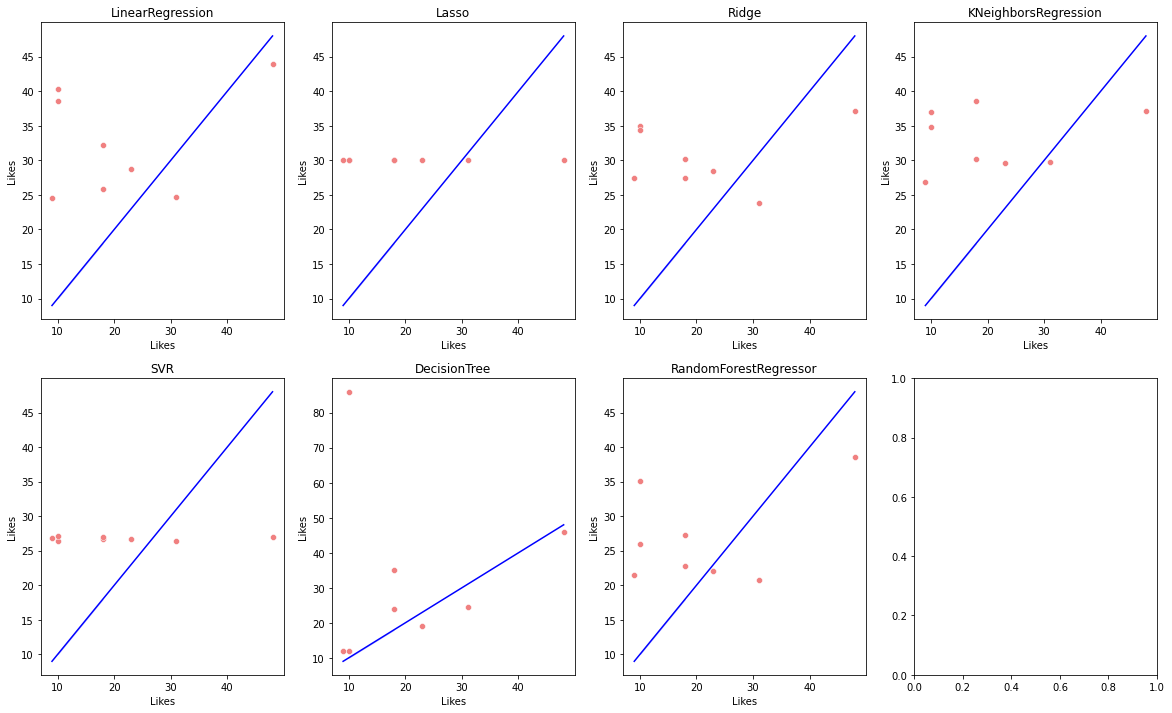

In [54]:
fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2],[1,3] ]

for items in range(0, len(model_list)): 
    i = si[items][0]
    j = si[items][1]
    sns.lineplot(y_test, y_test, color = 'blue', legend = True, ax=axes[i,j])
    sns.scatterplot(y_test, pred_list[items], color = 'lightcoral', legend = True, ax=axes[i,j])
    axes[i,j].set_title(model_list[items])    
    #axes[i,j].set_xlabel('rom y test)')
    #axes[i,j].set_ylabel(f'FWI (from {lnames[items]})')
    #axes[i,j].legend(['y_test', lnames[items] ])
    
    
plt.show()

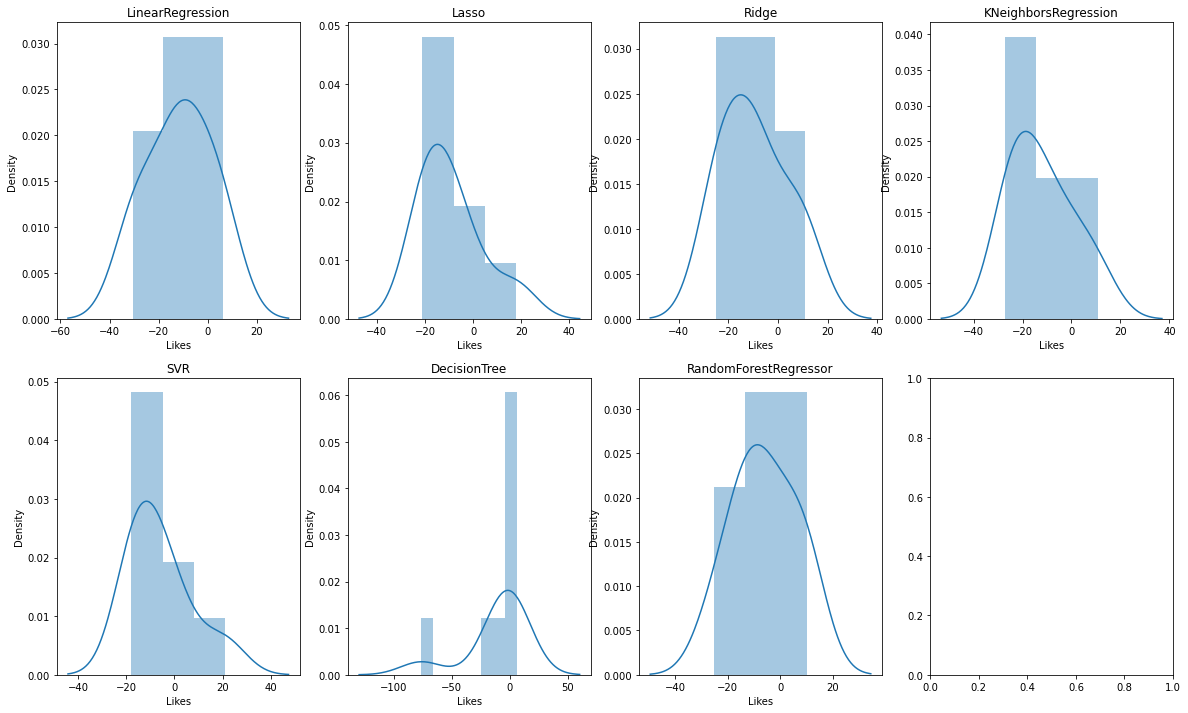

In [55]:
fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2],[1,3] ]

for items in range(0, len(model_list)): 
    i = si[items][0]
    j = si[items][1]
    #sns.lineplot(y_test, y_test, color = 'blue', legend = True, ax=axes[i,j])
    sns.distplot(y_test - pred_list[items], ax=axes[i,j])
    axes[i,j].set_title(model_list[items])    
    
plt.show()

## Comments and Discussions 


- The analysis was done with and without outliers, and it is found that removing outliers decrease the metric values. 

- Ofcourse, the result does not seem very good, the metric values are high, $R^2$ has a negative value. But one need to also consider that the data set it very small and number of features are also small, which may lead to negative $R^2$ values.  

- Among all the models, Random Forest does better job.  